AI Assignment
Mason Holland
Data Science

For this entire assignment I used ChatGPT 4o 

First Input to ChatGPT:

Write code for me to load this dataset into a python file and also import the necessary libraries to do basic visualization, also pandas for maniputlation and scikit-learn too

In [46]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading the dataset
file_path = 'card_transdata.csv'  # Update with the correct path if necessary
dataset = pd.read_csv(file_path)

# Displaying the first few rows of the dataset for inspection




Prompt: Display the first few rows of a dataset and general information about the shape, and statistics of the dataset using python

In [47]:
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

   distance_from_home  distance_from_last_transaction   
0           57.877857                        0.311140  \
1           10.829943                        0.175592   
2            5.091079                             NaN   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip   
0                        1.945940              1.0        1.0  \
1                        1.294219              1.0        NaN   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0      0  
1              0.0           0.0      0  
2              0.0           1.0      0  
3              0.0           1.0      0  
4              0.0           1.0      0  
(999, 8)
<clas

Prompt: Check for missing values

In [48]:
print("Missing values in each column:")
print(dataset.isnull().sum())

Missing values in each column:
distance_from_home                0
distance_from_last_transaction    3
ratio_to_median_purchase_price    2
repeat_retailer                   7
used_chip                         4
used_pin_number                   2
online_order                      4
fraud                             0
dtype: int64


Prompt: Drop rows with null values, Display the first few rows of the cleaned DataFrame

In [49]:
# Dropping rows with null values
dataset = dataset.dropna()

# Displaying the first few rows of the cleaned DataFrame
print("First few rows of the cleaned DataFrame:")
print(dataset.head())


First few rows of the cleaned DataFrame:
   distance_from_home  distance_from_last_transaction   
0           57.877857                        0.311140  \
3            2.247564                        5.600044   
4           44.190936                        0.566486   
5            5.586408                       13.261073   
6            3.724019                        0.956838   

   ratio_to_median_purchase_price  repeat_retailer  used_chip   
0                        1.945940              1.0        1.0  \
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   
5                        0.064768              1.0        0.0   
6                        0.278465              1.0        0.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0      0  
3              0.0           1.0      0  
4              0.0           1.0      0  
5              0.0           0.0      0  
6              

Prompt: Using seaborn visualize the distribution of each feature, use a countplot for binary features and a histplot for the others

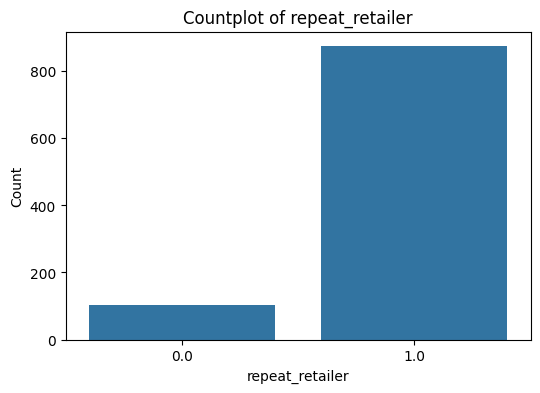

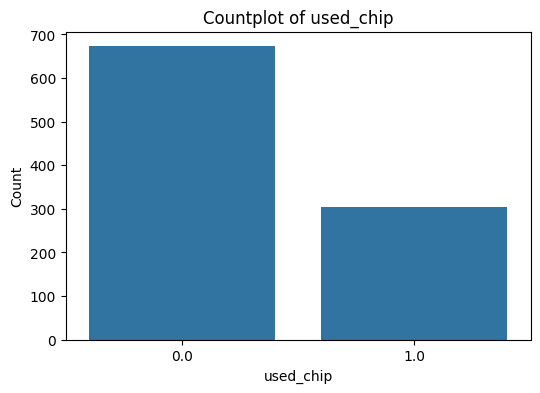

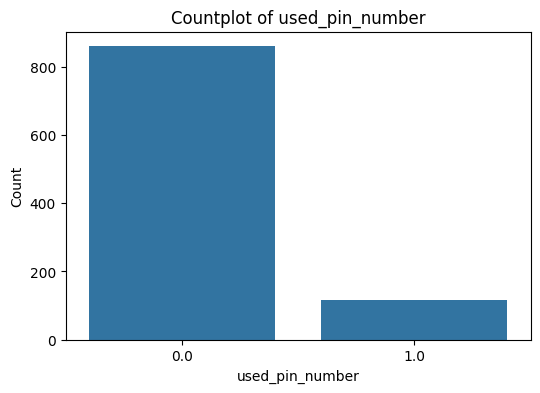

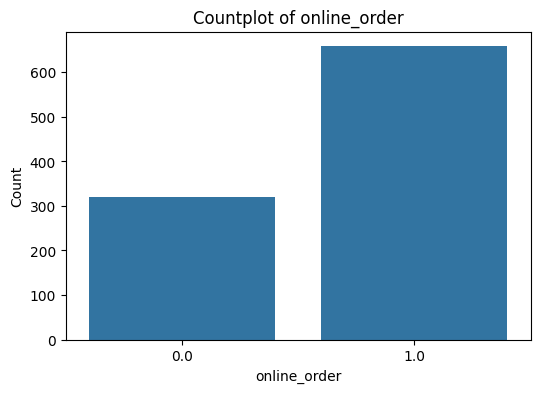

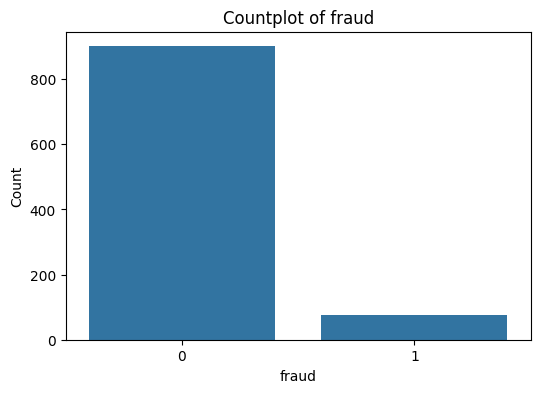

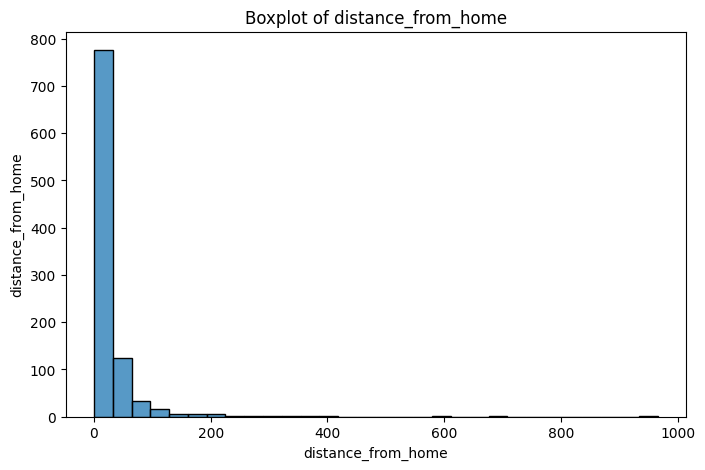

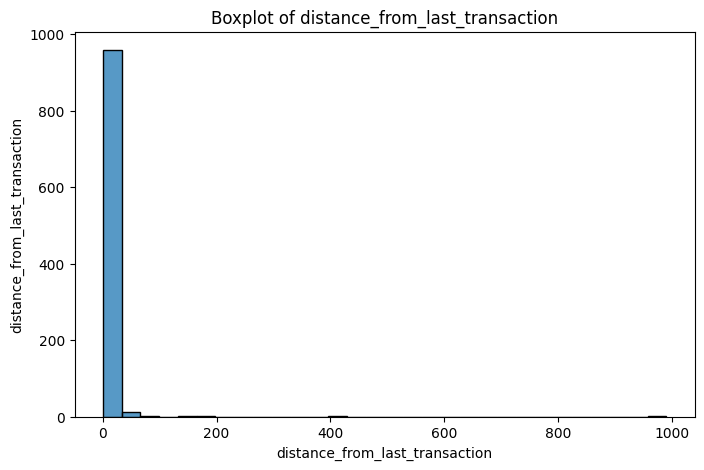

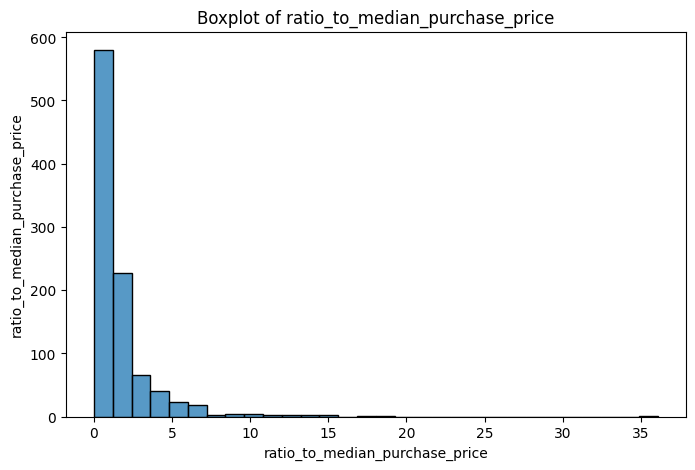

In [50]:
import seaborn as sns

binary_columns = [col for col in dataset.columns if dataset[col].dropna().isin([0, 1]).all()]
non_binary_columns = [col for col in dataset.columns if col not in binary_columns]

# Visualizing binary features with countplot
for column in binary_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=dataset[column], data=dataset)
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Visualizing non-binary features with boxplot
for column in non_binary_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(dataset[column], bins=30)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

Prompt: 
Create a count plot to show the number of transactions that were fraudulent vs non-fraudulent when a transaction was from the same retailer or not

Also, Create a percentage plot to show the percentage of fraudulent transactions when a transaction was from the same retailer or not

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

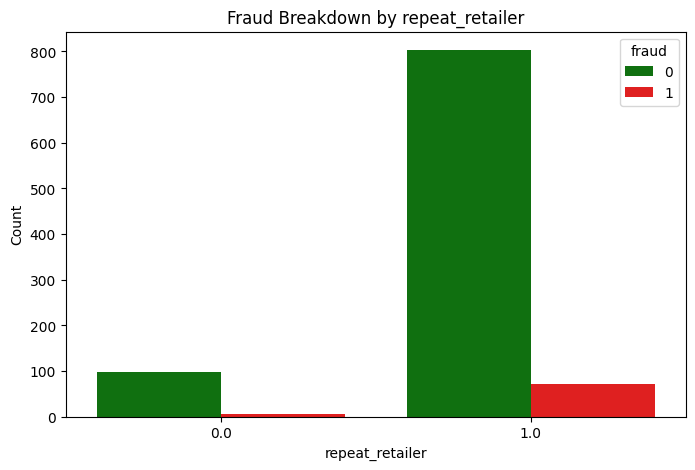

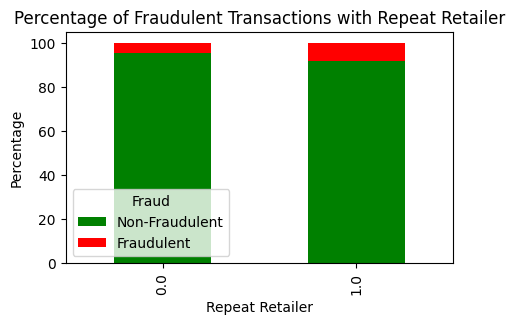

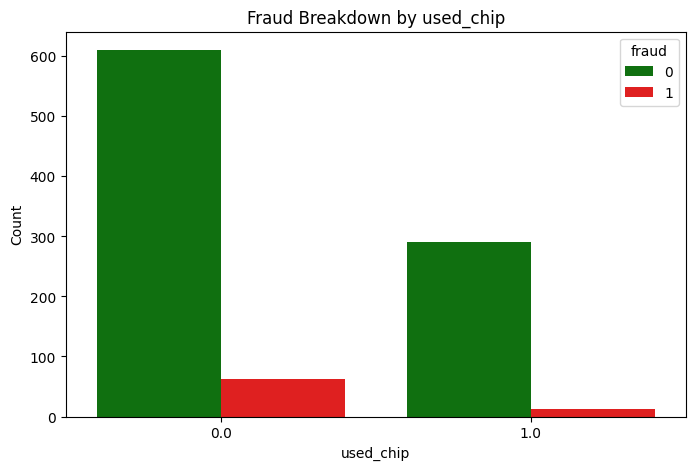

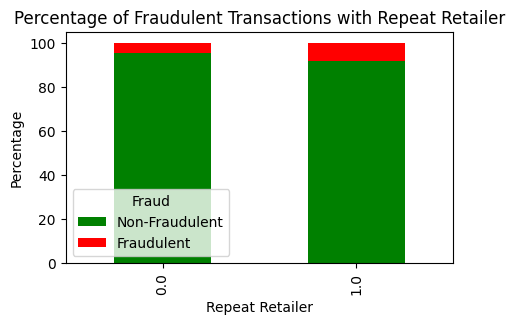

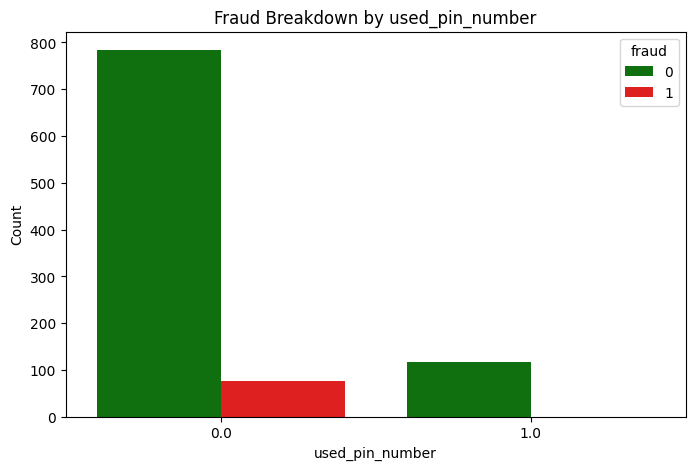

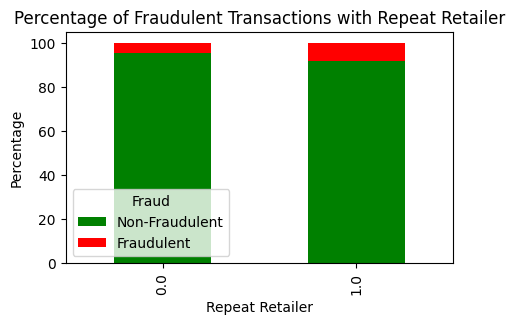

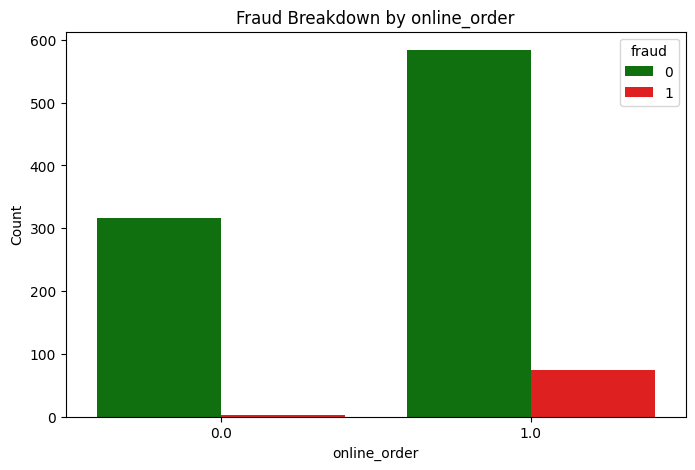

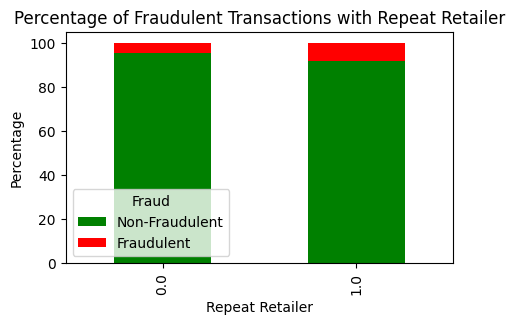

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors for fraud and non-fraud
colors = {0: 'green', 1: 'red'}

# Loop through each feature to create visualizations
for column in dataset.columns:
    if column != "fraud":  # Exclude the target column itself
        plt.figure(figsize=(8, 5))

        

        # If binary, use countplot
        if dataset[column].dropna().isin([0, 1]).all():
            sns.countplot(data=dataset, x=column, hue="fraud", palette=colors)
            plt.title(f'Fraud Breakdown by {column}')
            plt.xlabel(column)
            plt.ylabel('Count')

            df_retailer_fraud = dataset.groupby('repeat_retailer')['fraud'].value_counts(normalize=True).unstack() * 100

            df_retailer_fraud.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(5, 3))
            plt.title('Percentage of Fraudulent Transactions with Repeat Retailer')
            plt.xlabel('Repeat Retailer')
            plt.ylabel('Percentage')
            plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
            plt.show()
            
        
        

        plt.show()


Prompt: Create a scatter plot to show Fraudulent vs Non-Fraudulent Transactions: Distance from Home vs Ratio to Median Purchase Price, Fraudulent vs Non-Fraudulent Transactions: Distance from Home vs Distance from Last Transaction, 



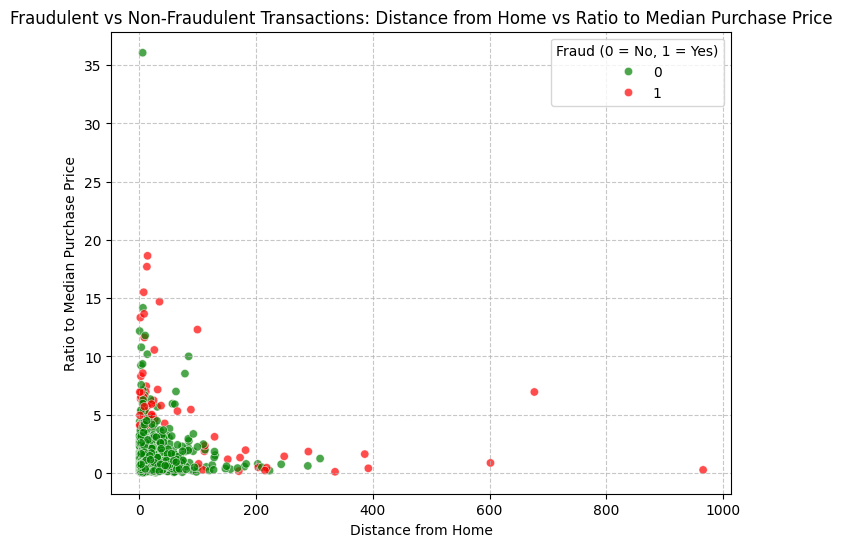

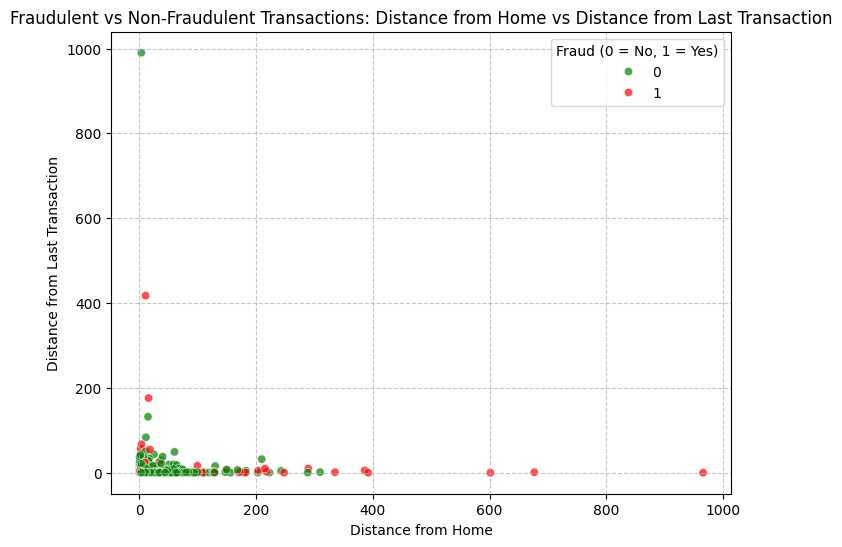

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Fraudulent vs Non-Fraudulent Transactions
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=dataset['distance_from_home'],
    y=dataset['ratio_to_median_purchase_price'],
    hue=dataset['fraud'],  # Color by fraud status
    palette={0: 'green', 1: 'red'},  # Green for non-fraud, red for fraud
    alpha=0.7  # Transparency for better visibility
)
plt.title('Fraudulent vs Non-Fraudulent Transactions: Distance from Home vs Ratio to Median Purchase Price')
plt.xlabel('Distance from Home')
plt.ylabel('Ratio to Median Purchase Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Fraud (0 = No, 1 = Yes)')
plt.show()


# Scatter plot for Fraudulent vs Non-Fraudulent Transactions
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=dataset['distance_from_home'],
    y=dataset['distance_from_last_transaction'],
    hue=dataset['fraud'],  # Color by fraud status
    palette={0: 'green', 1: 'red'},  # Green for non-fraud, red for fraud
    alpha=0.7  # Transparency for better visibility
)
plt.title('Fraudulent vs Non-Fraudulent Transactions: Distance from Home vs Distance from Last Transaction')
plt.xlabel('Distance from Home')
plt.ylabel('Distance from Last Transaction')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Fraud (0 = No, 1 = Yes)')
plt.show()


Using train_test_split from sklearn, generate code to do a 80, 20 split

In [53]:
from sklearn.model_selection import train_test_split

# Select features and target variable
X = dataset.drop('fraud', axis=1)  # Features
y = dataset['fraud']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # 20% of the data will be used for testing
    random_state=42,  # Ensures reproducibility
    stratify=y  # Maintains the same fraud to non-fraud ratio in both splits
)

# Print basic information about the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Fraud distribution in training set: \n{y_train.value_counts(normalize=True)}")
print(f"Fraud distribution in testing set: \n{y_test.value_counts(normalize=True)}")


Training set size: 781 samples
Testing set size: 196 samples
Fraud distribution in training set: 
fraud
0    0.921895
1    0.078105
Name: proportion, dtype: float64
Fraud distribution in testing set: 
fraud
0    0.923469
1    0.076531
Name: proportion, dtype: float64


## Never Fraud Model Copied from Notebook

In [54]:
# Never Fraud Model
y_pred_never_fraud = [0] * len(y_test)

# Print just the first 100 predictions
print(y_pred_never_fraud[:100]) # Notice how all predictions are always 0, non-fradulent

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Prompt: Create a basic k-NN Classifier with 3-nn and print out the first 100 predictions

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize the k-NN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Train the k-NN classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Print the first 100 predictions
print("First 100 Predictions:")
print(y_pred[:100])


First 100 Predictions:
[0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


Prompt: Create a confusion matrix and display it using a seaborn heatmap with a red hue. Also display the cassification report.

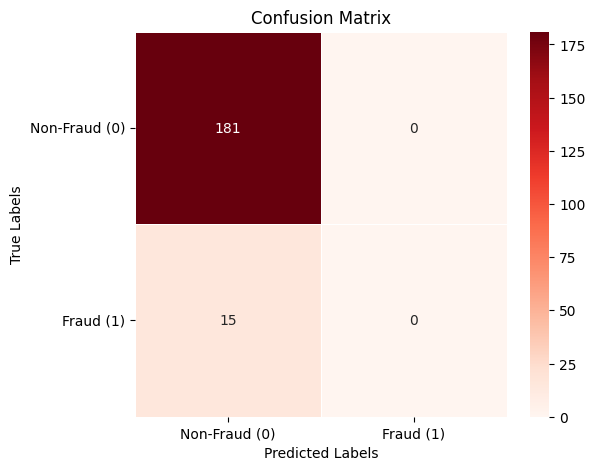

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       181
           1       0.00      0.00      0.00        15

    accuracy                           0.92       196
   macro avg       0.46      0.50      0.48       196
weighted avg       0.85      0.92      0.89       196



c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_never_fraud)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,  # Display the values in the matrix
    fmt='d',  # Format as integers
    cmap='Reds',  # Red color map
    linewidths=0.5,  # Add gridlines for readability
    cbar=True
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Fraud (0)', 'Fraud (1)'], rotation=0)
plt.show()

#Display the classification report for the confusion matrix
print(classification_report(y_test, y_pred_never_fraud))


I just copied the code and made it blue for the simple knn

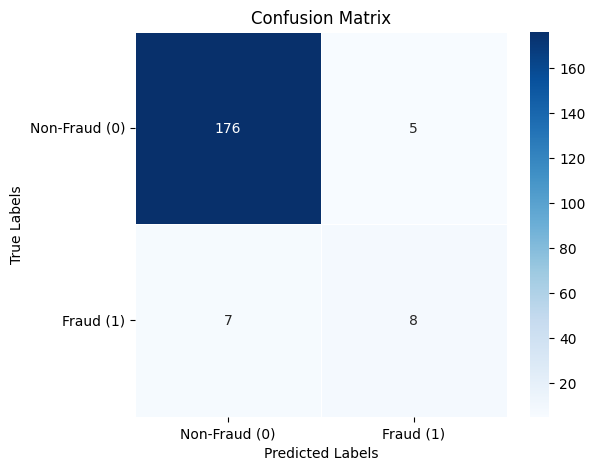

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       181
           1       0.62      0.53      0.57        15

    accuracy                           0.94       196
   macro avg       0.79      0.75      0.77       196
weighted avg       0.94      0.94      0.94       196



In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,  # Display the values in the matrix
    fmt='d',  # Format as integers
    cmap='Blues',  # Red color map
    linewidths=0.5,  # Add gridlines for readability
    cbar=True
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Fraud (0)', 'Fraud (1)'], rotation=0)
plt.show()

#Display the classification report for the confusion matrix
print(classification_report(y_test, y_pred))

c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


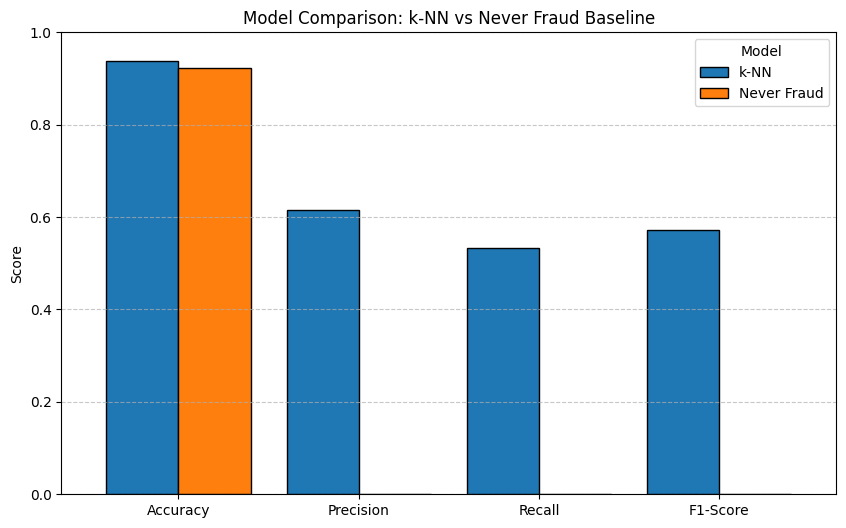

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Baseline model: Always predicts "Non-Fraud (0)"
y_pred_never_fraud = [0] * len(y_test)

# Compute metrics for y_pred
metrics_knn = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred),
}

# Compute metrics for y_pred_never_fraud
metrics_baseline = {
    "Accuracy": accuracy_score(y_test, y_pred_never_fraud),
    "Precision": precision_score(y_test, y_pred_never_fraud, zero_division=0),
    "Recall": recall_score(y_test, y_pred_never_fraud, zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_never_fraud, zero_division=0),
}

# Prepare data for visualization
metrics_df = pd.DataFrame([metrics_knn, metrics_baseline], index=["k-NN", "Never Fraud"])

# Plot the comparison
metrics_df.T.plot(kind="bar", figsize=(10, 6), width=0.8, edgecolor="black")
plt.title("Model Comparison: k-NN vs Never Fraud Baseline")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Model", loc="best")
plt.show()
